In [20]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

## Problem 28

### For this problem, we will be using some functions we wrote in a previous exercise. Let's go grab them from the utilities folder

In [21]:
import sys
import os 
from pathlib import Path
root = Path(os.getcwd()).parent.parent
sys.path.append(os.path.join(root,"Utilities"))
from shared_functions import DCT_1,DST_1

### We can now plot the desired functions. Let's first write them down so we can call them later.

In [40]:
def u_N(x:float,
        N:int)->float:
    """
    Truncated series for (1.37)

    Parameters:
    ----------
    x: float
        Real number in (-\pi,\pi)
    N: int
        Truncation parameter

    Returns:
    :float
        Output of function
    """
    return sum([2/(j+1)*np.power(-1,j)*np.sin((j+1)*x) for j in range(N)])

def v_N(x:float,
        N:int)->float:
    """
    Truncated series for (1.38)

    Parameters:
    ----------
    x: float
        Real number in (-\pi,\pi)
    N: int
        Truncation parameter

    Returns:
    --------
    :float
        Output of function
    """
    return np.pi/2+sum([2/np.pi*np.power((j+1),-2)(np.cos((j+1)*np.pi)-1)*np.cos((j+1)*x) for j in range(N)])


u_N_vec = np.vectorize(u_N,excluded=['N'])
v_N_vec = np.vectorize(v_N,excluded=['N'])

### We now need to generate the values of N we wish to plot. You may replace the list below with your list of choice, but we will use the following list.

In [101]:
N_arr = [2,5,10,1000]

In [114]:
def plot_u_N_vs_truth(N_arr:List[int]):
    """
    Plots u_N computed by straight line
    interpolation of FFT of points
    as described in the problem vs the true 
    curve

    Parameters:
    ----------
    N_arr: List of integers to consider
    """

    M = len(N_arr)
    m_1 = int(np.sqrt(M))
    m_2 = int(np.ceil(M/m_1))
    fig,axs = plt.subplots(nrows=m_1,
                           ncols=m_2)
    for count,N in enumerate(N_arr):
        x_val = count%m_1
        y_val = count//m_1
        times = np.linspace(-np.pi,np.pi,1000)
        u_N_truth = u_N_vec(x=times,N=N)
        eval_points = np.pi/(N+1)*np.array(range(-N,N+1))
        x = np.array([2/(j+1)*np.power(-1,j) for j in range(N)])
        y = DST_1(x)
        eval = np.zeros(2*N+1,dtype=complex)
        eval[-N:] = y
        eval[:N] = -y[::-1]
        axs[x_val,y_val].plot(times,u_N_truth,label="Truth")
        axs[x_val,y_val].plot(eval_points,eval,label="Straight-line")
        axs[x_val,y_val].set_title(f"N = {N}")
        axs[x_val,y_val]

    handles, labels = axs[-1,-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    fig.suptitle("Comparison of Truth Versus Approximation\n Across a Range of N")
    plt.tight_layout()
    plt.show()


def plot_v_N_vs_truth(N_arr:List[int]):
    #TODO: Need to fix this
    """
    Plots u_N computed by straight line
    interpolation of FFT of points
    as described in the problem vs the true 
    curve

    Parameters:
    ----------
    N_arr: List of integers to consider
    """
    M = len(N_arr)
    m_1 = int(np.sqrt(M))
    m_2 = int(np.ceil(M/m_1))
    fig,axs = plt.subplots(nrows=m_1,
                           ncols=m_2)
    for count,N in enumerate(N_arr):
        x_val = count%m_1
        y_val = count//m_1
        times = np.linspace(-np.pi,np.pi,1000)
        u_N_truth = v_N_vec(x=times,N=N)
        eval_points = np.pi/(N+1)*np.array(range(-N,N+1))
        x = np.zeros(N)
        x = np.array([2/(j+1)*np.power(-1,j) for j in range(N)])
        y = DCT_1(x)
        eval = np.zeros(2*N+1,dtype=complex)
        eval[-N:] = y
        eval[:N] = -y[::-1]
        axs[x_val,y_val].plot(times,u_N_truth,label="Truth")
        #axs[x_val,y_val].plot(eval_points,eval,label="Straight-line")
        axs[x_val,y_val].set_title(f"N = {N}")
        axs[x_val,y_val]

    handles, labels = axs[-1,-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    fig.suptitle("Comparison of Truth Versus Approximation\n Across a Range of N")
    plt.tight_layout()
    plt.show()

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


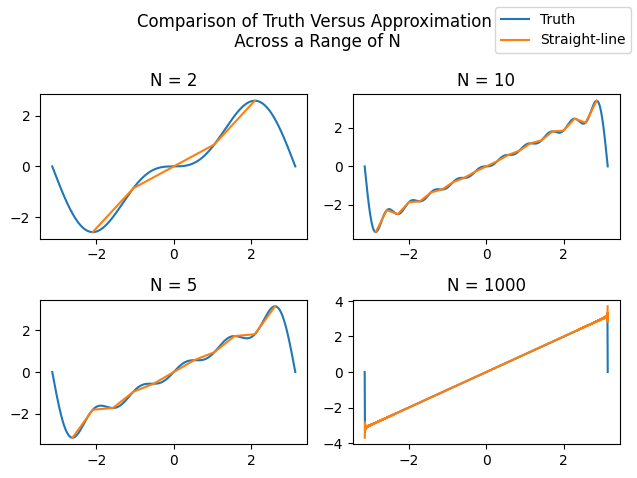

In [115]:
plot_u_N_vs_truth(N_arr=N_arr)